<a href="https://colab.research.google.com/github/santiagorg2401/SANPR-TF/blob/main/SANPR_TF_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Secure Automatic Number-Plate Recognition with Tensorflow: segmentation.

Detect cars and license plates from an image.

## Install YOLO V5 Ultralytics.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install -q roboflow

## Fine-tune on custom licence plate augmented dataset.
Using modified [CCPD (Chinese City Parking Dataset, ECCV)](https://github.com/detectRecog/CCPD) by Xu, Zhenbo and Yang, Wei and Meng, Ajin and Lu, Nanxue and Huang, Huan

@inproceedings{xu2018towards,
  title={Towards End-to-End License Plate Detection and Recognition: A Large Dataset and Baseline},
  author={Xu, Zhenbo and Yang, Wei and Meng, Ajin and Lu, Nanxue and Huang, Huan},
  booktitle={Proceedings of the European Conference on Computer Vision (ECCV)},
  pages={255--271},
  year

In [7]:
import torch
import os
from IPython.display import Image, clear_output  # to display images
import matplotlib.pyplot as plt


print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu117 (NVIDIA GeForce RTX 3060 Laptop GPU)


In [ ]:
!python yolov5/train.py --img 1160\
               --batch 32\
               --epochs 100\
               --data LicensePlates/data.yaml\
               --weights yolov5s.pt\
              #  --workers {WORKERS}\
              #  --project {PROJECT}\
              #  --name {RUN_NAME}\
               --exist-ok

(-0.5, 719.5, 1159.5, -0.5)

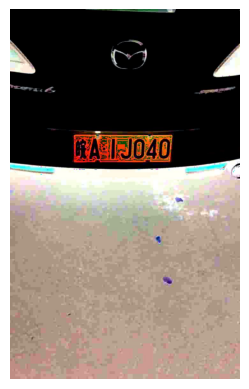

In [19]:
# # Predict on an image
# results = model("datasets/CCPD2019_AUG_YOLO/test/images/ccpd_539991.jpg")

# for result in results:
#     boxes = result.boxes  # Boxes object for bbox outputs
#     masks = result.masks  # Masks object for segmenation masks outputs
#     probs = result.probs  # Class probabilities for classification output

img = plt.imread("LicensePlates/test/images/ccpd_539995.jpg")
plt.imshow(img)
plt.axis(False)
# xywh = boxes[0].xywh
# xywh = xywh.cpu()
# xywh = xywh.numpy()
# plt.gca().add_patch(Rectangle(
#     xywh[0][0:2], xywh[0][2], xywh[0][3], linewidth=1, edgecolor='r', facecolor='none'))

In [21]:
img.shape

(1160, 720, 3)

In [ ]:
# Export the model to ONNX format
success = model.export(format="onnx")